<h1>Mushroom Classification</h1>

<h2>Table of Contents</h2>

<div class="alert alert-block" style="background-color:#848482 ">
    <ol>
        <li>Understanding Data</li>
        <li>Reading Data</li>
        <li>Exploring Data</li>
        <li>Visualizing the Data</li>
        <li>Preprocessing</li>
        <li>Split Data into features (X) and target (y)</li>
        <li>Split Data into Train/Test sets</li>
        <li>Training Model</li>
        <li>Evaluation</li>
    </ol>
</div>

<h2>Understanding Data</h2>

<p>The Mushroom Classification dataset from Kaggle is a classic example used in machine learning for binary classification tasks. It contains 8,124 instances of mushrooms, each described by 22 categorical features, and a target variable indicating whether the mushroom is edible or poisonous.</p>

<h2>Loading Packages</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

<h2>Reading Data</h2>

In [2]:
data = pd.read_csv("data/mushrooms.csv")

<h2>Exploring Data</h2>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<h2>Visualizing Data</h2>

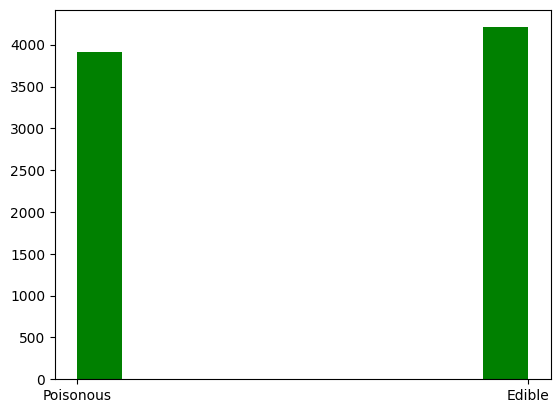

In [5]:
plt.hist(data["class"], color="green")
plt.xticks(ticks=[0,1], labels=['Poisonous', 'Edible'])
plt.show()

<h2>Preprocessing</h2>

In [6]:
# Changin labels into numbers

for i in data.columns:
    data[i] = LabelEncoder().fit_transform(data[i])

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


<h2>Split Data into features (X) and target (y)</h2>

In [7]:
X = data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']].values

X[:5]

array([[5, 2, 4, 1, 6, 1, 0, 1, 4, 0, 3, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5],
       [5, 2, 9, 1, 0, 1, 0, 0, 4, 0, 2, 2, 2, 7, 7, 0, 2, 1, 4, 3, 2, 1],
       [0, 2, 8, 1, 3, 1, 0, 0, 5, 0, 2, 2, 2, 7, 7, 0, 2, 1, 4, 3, 2, 3],
       [5, 3, 8, 1, 6, 1, 0, 1, 5, 0, 3, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5],
       [5, 2, 3, 0, 5, 1, 1, 0, 4, 1, 3, 2, 2, 7, 7, 0, 2, 1, 0, 3, 0, 1]])

In [8]:
y = data["class"]

y[:5]

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

<h2>Split Data into Train/Test sets</h2>

In [9]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=12, train_size=0.8)

print("Train Size:", train_X.shape[0]," Test Size:", test_X.shape[0])

Train Size: 6499  Test Size: 1625


<h2>Training Model</h2>

In [10]:
model = RandomForestClassifier(criterion="entropy", random_state=42)  # Define Model
model.fit(train_X, train_y)  # Fit Model
model

RandomForestClassifier(criterion='entropy', random_state=42)

<h2>Evaluation</h2>

In [11]:
predict_y = model.predict(test_X)  # Predict test

accuracy = accuracy_score(test_y, predict_y)
accuracy

1.0